In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# key constants
upper_emission_delta = 30000000 #particles/min
lower_emission_delta = 30000
intermediate = upper_emission_delta / 2**(23.3-20.5)

room_size = 28.317*4000 #liters

lifetime = 1.628 #hours
deg_rate = 1/(lifetime*60) # 1/min

In [2]:
# functions to calculate viral concentration in room
def get_filt_removal(vol, filt_eff, filt_rate):
    # calculates the fraction of viral particles in the room eliminated per unit time by filtration
    frac_air_pertime = filt_rate/vol
    return(frac_air_pertime * filt_eff)

def virus_steady_conc(k_emit, k_deg, vol, filt_eff=0, filt_rate=0, mask_eff=0, ret_log10=False):
    # returns steady state concentration of virus; must have k_deg > 0
    # same definitions for arguments as in virus_conc function
    k_emit = (1-mask_eff)*k_emit
    k_remove = k_deg + get_filt_removal(vol, filt_eff, filt_rate)
    if ret_log10:
        return(np.log10(k_emit/(vol*k_remove)))
    else:
        return(k_emit/(vol*k_remove))

def virus_conc(t, k_emit, k_deg, vol, filt_eff=0, filt_rate=0, mask_eff=0):
    # calculates particle concentration over time
    # MAKE SURE ARGUMENTS HAVE COMPATIBLE UNITS (e.g., time is always in minutes)
    # t: time elapsed after emitter enters room
    # k_emit: rate of emission (particles/time)
    # k_deg: rate of particle degradation (1/time)- avg lifetime is 1/k_deg
    # vol: room volume
    # filt_eff: fraction of particles removed by filter (from 0 to 1; 1 if all particles that cycle through filter are removed)
    # filt_rate: rate (vol/time) at which air goes through filter
    # mask_eff: fraction of particles removed by mask on emitter (from 0 to 1; 1 if all particles stopped by mask)
    # Returns: particles/vol in room
    k_emit = (1-mask_eff)*k_emit
    k_remove = k_deg + get_filt_removal(vol, filt_eff, filt_rate)
    if k_remove > 0:
        return((1-np.exp(-k_remove*t))*k_emit/(vol*k_remove))
    else:
        return(k_emit*t/vol)
    
def virus_dissipate(t, k_emit, k_deg, vol, filt_eff=0, filt_rate=0, mask_eff=0):
    # calculates particle concentration over time
    # MAKE SURE ARGUMENTS HAVE COMPATIBLE UNITS (e.g., time is always in minutes)
    # t: time elapsed after emitter enters room
    # k_emit: rate of emission (particles/time)
    # k_deg: rate of particle degradation (1/time)- avg lifetime is 1/k_deg
    # vol: room volume
    # filt_eff: fraction of particles removed by filter (from 0 to 1; 1 if all particles that cycle through filter are removed)
    # filt_rate: rate (vol/time) at which air goes through filter
    # mask_eff: fraction of particles removed by mask on emitter (from 0 to 1; 1 if all particles stopped by mask)
    # Returns: particles/vol in room
    
    init = virus_steady_conc(k_emit, k_deg, vol, filt_eff, filt_rate, mask_eff)
    k_remove = k_deg + get_filt_removal(vol, filt_eff, filt_rate)
    return(init*np.exp(-k_remove*t))

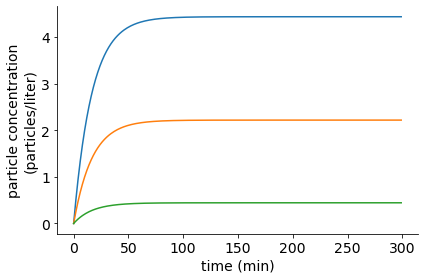

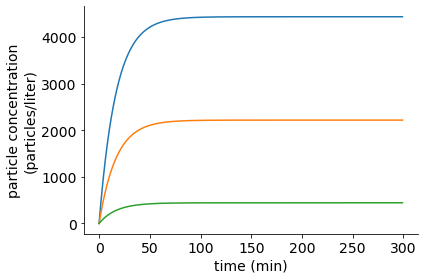

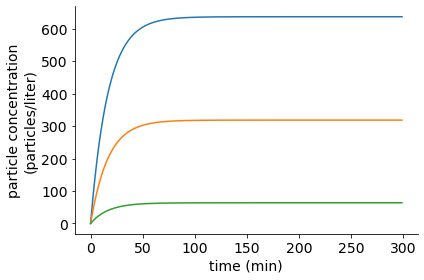

In [76]:
# FIGURE 1 PLOTS

# time dependent viral concentration (wuhan)
times = np.arange(300)
yvals = [virus_conc(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99) for x in times]
yvals2 = [virus_conc(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.5) for x in times]
yvals3 = [virus_conc(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.9) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# time dependent viral concentration (delta)
times = np.arange(300)
yvals = [virus_conc(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99) for x in times]
yvals2 = [virus_conc(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.5) for x in times]
yvals3 = [virus_conc(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.9) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# time dependent viral concentration (delta)
times = np.arange(300)
yvals = [virus_conc(x, intermediate, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99) for x in times]
yvals2 = [virus_conc(x, intermediate, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.5) for x in times]
yvals3 = [virus_conc(x, intermediate, deg_rate, room_size, filt_rate=room_size*3/60, filt_eff=0.99, mask_eff = 0.9) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

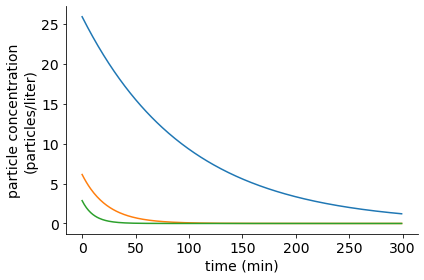

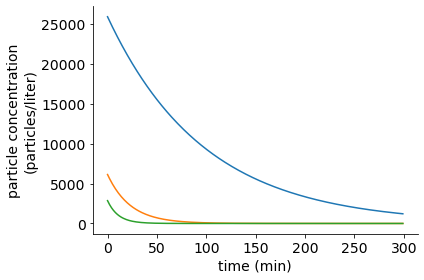

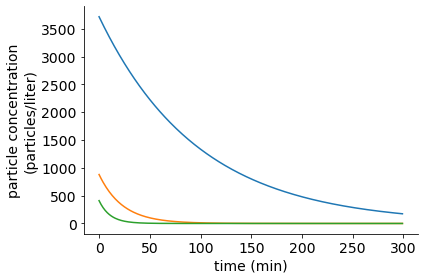

In [77]:
# FIGURE S1 PLOTS

# time dependent viral concentration (wuhan)
times = np.arange(300)
yvals = [virus_dissipate(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*0/60, filt_eff=0.99) for x in times]
yvals2 = [virus_dissipate(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*2/60, filt_eff=0.99) for x in times]
yvals3 = [virus_dissipate(x, lower_emission_delta, deg_rate, room_size, filt_rate=room_size*5/60, filt_eff=0.99) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# time dependent viral concentration (delta)
times = np.arange(300)
yvals = [virus_dissipate(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*0/60, filt_eff=0.99) for x in times]
yvals2 = [virus_dissipate(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*2/60, filt_eff=0.99) for x in times]
yvals3 = [virus_dissipate(x, upper_emission_delta, deg_rate, room_size, filt_rate=room_size*5/60, filt_eff=0.99) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# time dependent viral concentration (delta)
times = np.arange(300)
yvals = [virus_dissipate(x, intermediate, deg_rate, room_size, filt_rate=room_size*0/60, filt_eff=0.99) for x in times]
yvals2 = [virus_dissipate(x, intermediate, deg_rate, room_size, filt_rate=room_size*2/60, filt_eff=0.99) for x in times]
yvals3 = [virus_dissipate(x, intermediate, deg_rate, room_size, filt_rate=room_size*5/60, filt_eff=0.99) for x in times]
plt.figure()
plt.plot(times, yvals)
plt.plot(times, yvals2)
plt.plot(times, yvals3)
plt.xlabel("time (min)", fontsize=14)
plt.ylabel("particle concentration\n(particles/liter)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

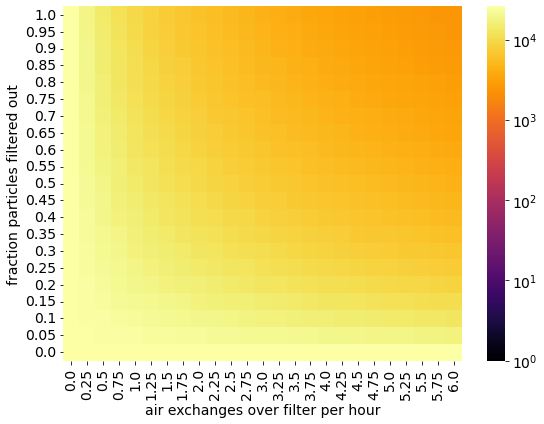

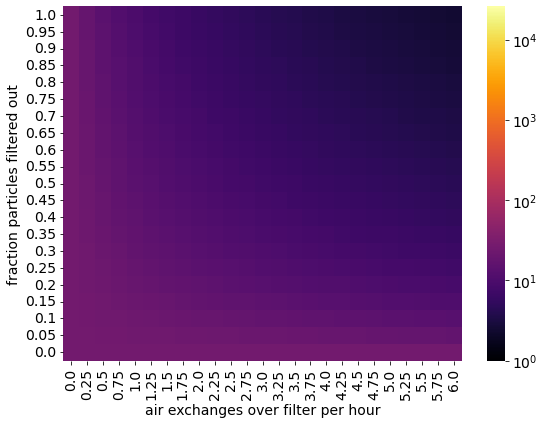

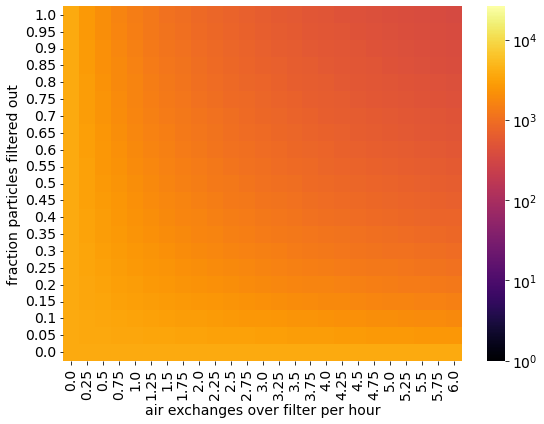

In [54]:
# FIGURE 2A-C PLOTS

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
xlab_text = "air exchanges over filter per hour"
mask_eff = 0 # change to value > 0 for mask on emitter

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_highemit = []
plot_intermed = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit, "intemit":plot_intermed})

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="highemit", index="eff", columns="rate") # can change from lowemit -> highemit

#max_for_plot = np.max(np.max(to_plot))
max_for_plot = np.max(plot_highemit)
min_for_plot = 0

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for low emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="lowemit", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for intermediate emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="intemit", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

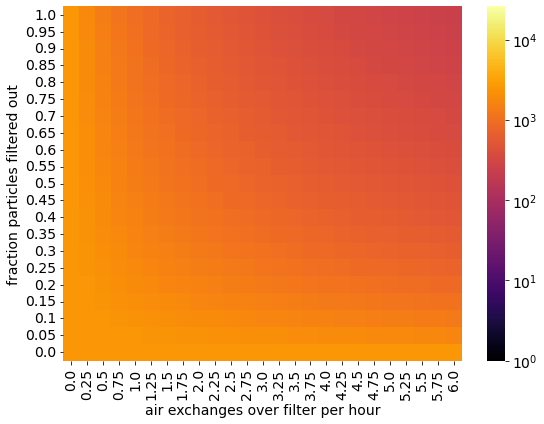

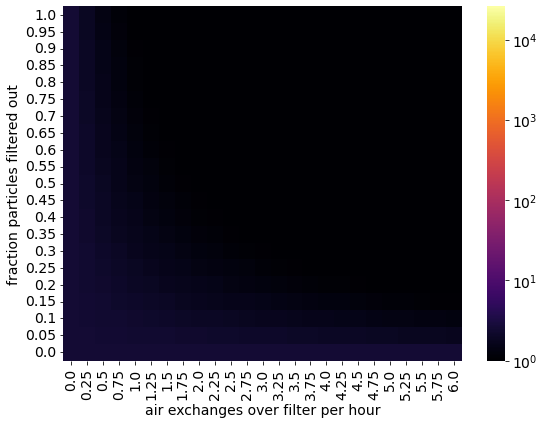

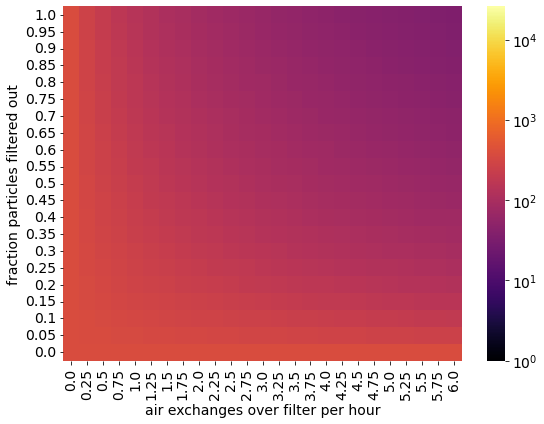

In [55]:
# FIGURE 2D-F PLOTS

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0.9 # change to value > 0 for mask on emitter
xlab_text = "air exchanges over filter per hour"

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_highemit = []
plot_intermed = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff, ret_log10=True))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit, "intemit":plot_intermed})

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="highemit", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for low emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="lowemit", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for intermediate emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="intemit", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("fraction particles filtered out", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

0.010237510237510239


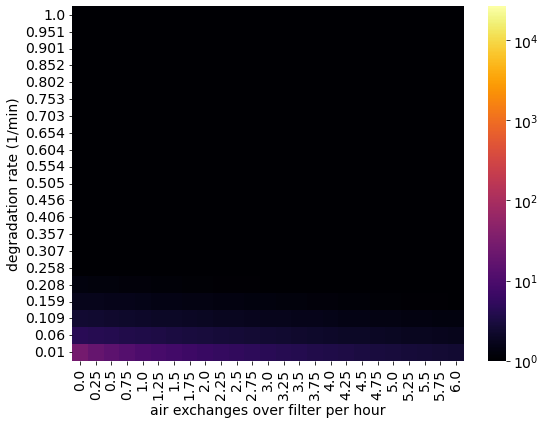

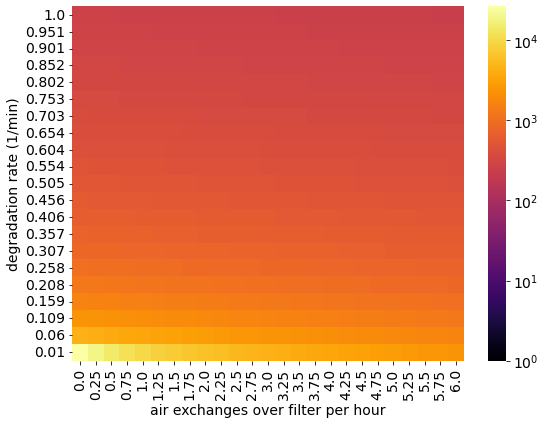

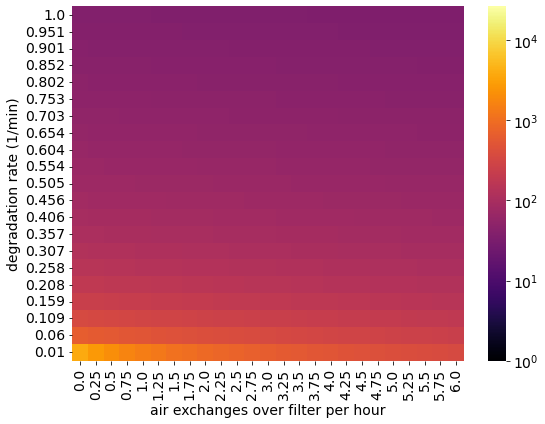

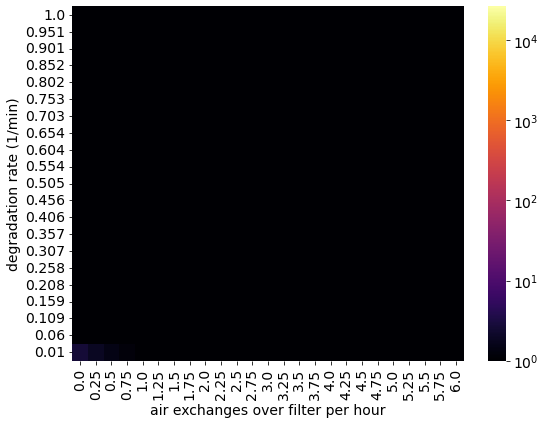

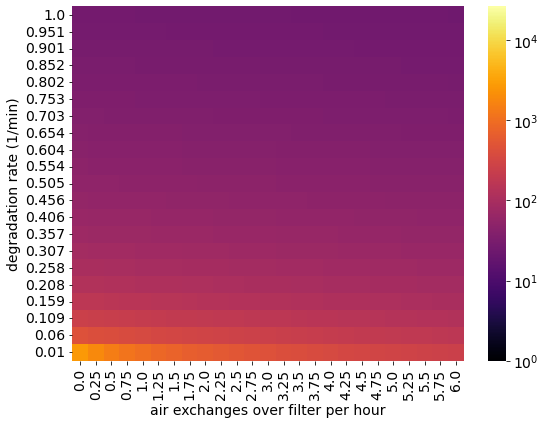

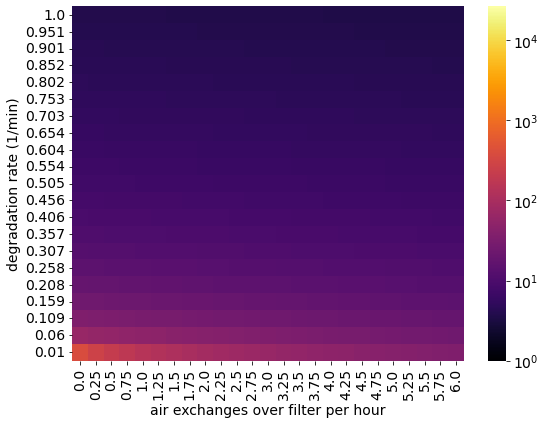

In [14]:
# FIGURE 3A-F PLOTS

lifetime = 1.628 #hours
deg_rate = 1/(lifetime*60) # 1/min
print(deg_rate)

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
deg_rates = np.linspace(0.01, 1, num=21)
#deg_rates = np.linspace(lifetime, lifetime/100, num=21)
#deg_rates = 1/(deg_rates*60)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0 # change to value > 0 for mask on emitter

xlab_text = "air exchanges over filter per hour"

plot_degs = []
plot_rates = []
plot_lowemit = []
plot_highemit = []
plot_intermed = []
for deg in deg_rates:
    for rate in filt_rates:
        plot_degs.append(deg)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
        plot_intermed.append(virus_steady_conc(intermediate, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
sweep_dat = pd.DataFrame({"deg":plot_degs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})

max_for_plot = np.max(plot_highemit)
min_for_plot = 0

# heatmap plotting for low emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="lowemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="highemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for intermediate emitter [int with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="intemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
#filt_effs = np.linspace(0.95, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0.9 # change to value > 0 for mask on emitter

plot_degs = []
plot_rates = []
plot_lowemit = []
plot_highemit = []
plot_intermed = []
for deg in deg_rates:
    for rate in filt_rates:
        plot_degs.append(deg)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
        plot_intermed.append(virus_steady_conc(intermediate, deg, room_size, filt_rate=rate, filt_eff=0.99, mask_eff=mask_eff, ret_log10=True))
sweep_dat = pd.DataFrame({"deg":plot_degs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})

# heatmap plotting for low emitter [wuhan with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="lowemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="highemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for intermediate emitter [int with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="intemit", index="deg", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel("degradation rate (1/min)", fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

In [6]:
frac_deposited = 0.005790516615061633

# breathing rate (adults): 12-16 breaths per min
# breathing rate (children age 6-18): 15-24 breaths per min
# breath volume: 0.5 L per breath

breath_rate_children = 15
breath_rate_adults = 12
breath_vol = 0.5

def number_transmitted(room_conc, frac_trans, breath_rate, breath_vol, time):
    rate_virus_inhaled = room_conc*breath_vol*breath_rate
    rate_transmitted = rate_virus_inhaled*frac_trans
    return(rate_transmitted*time)

In [15]:
intermediate

4307618.831238879

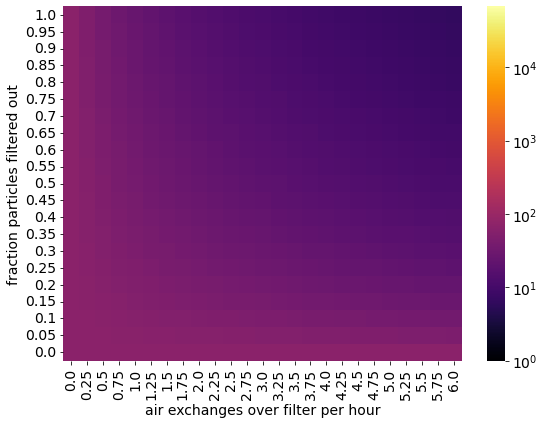

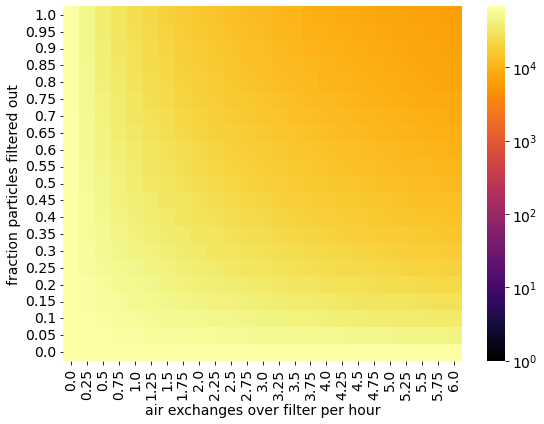

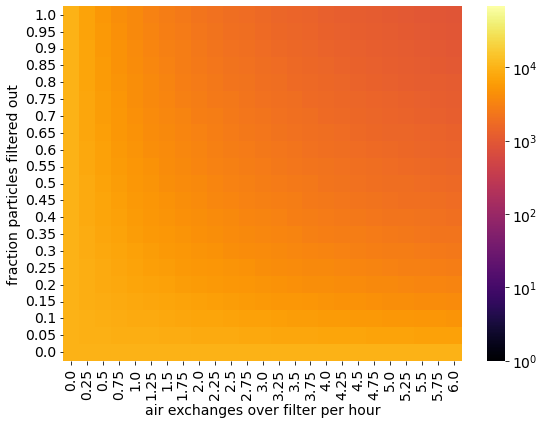

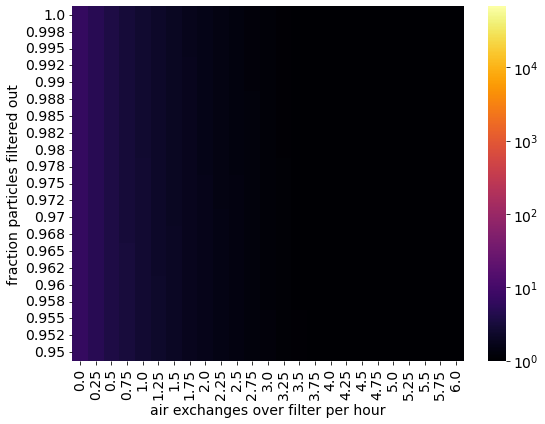

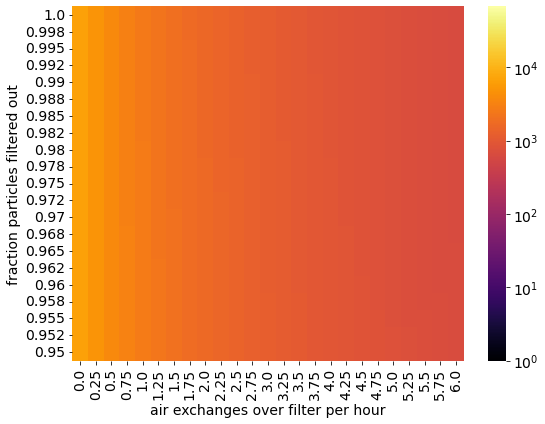

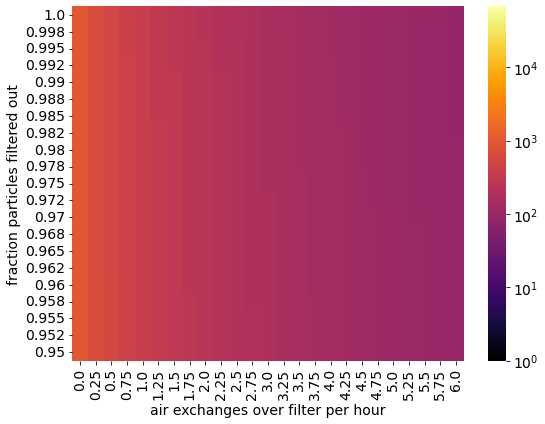

In [72]:
# FIGURE 4 PLOTS

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0 # change to value > 0 for mask on emitter
xlab_text = "air exchanges over filter per hour"
ylab_text = "fraction particles filtered out"

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_intermed = []
plot_highemit = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})
sweep_dat["low_dep"] = np.log10(number_transmitted(sweep_dat["lowemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["high_dep"] = np.log10(number_transmitted(sweep_dat["highemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["int_dep"] = np.log10(number_transmitted(sweep_dat["intemit"], frac_deposited, breath_rate_children, breath_vol, 60))

max_for_plot = np.max(sweep_dat["high_dep"])
min_for_plot = 0

# heatmap plotting for low emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="low_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="high_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="int_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0.95, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0.9 # change to value > 0 for mask on emitter

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_intermed = []
plot_highemit = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})
sweep_dat["low_dep"] = np.log10(number_transmitted(sweep_dat["lowemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["high_dep"] = np.log10(number_transmitted(sweep_dat["highemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["int_dep"] = np.log10(number_transmitted(sweep_dat["intemit"], frac_deposited, breath_rate_children, breath_vol, 60))

# heatmap plotting for low emitter [wuhan with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="low_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="high_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="int_dep", index="eff", columns="rate") # can change from lowemit -> highemit

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

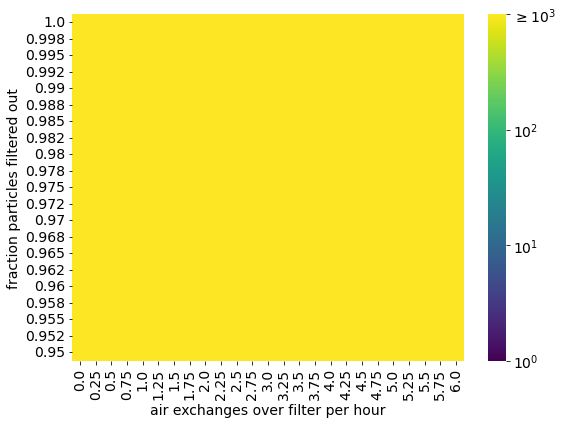

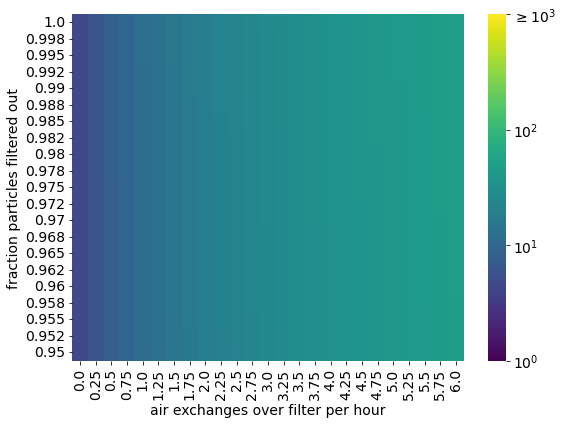

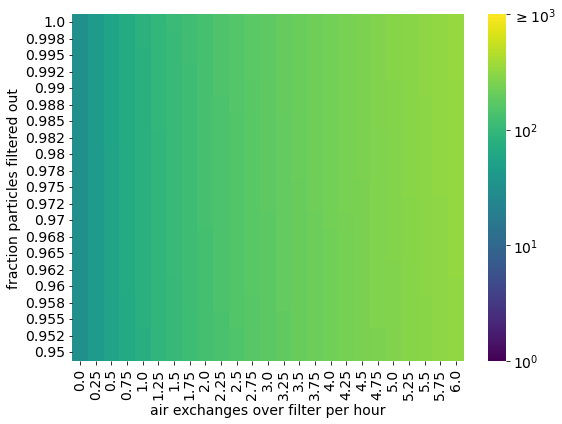

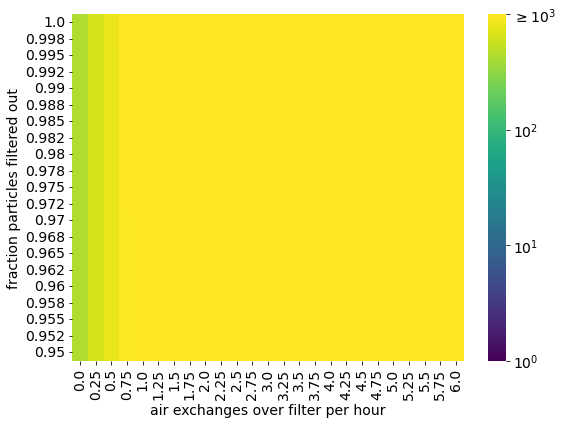

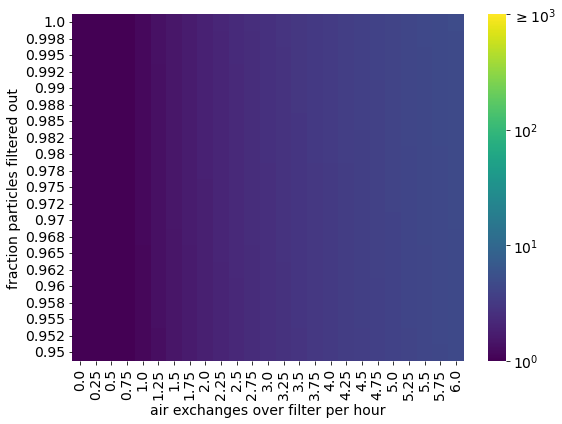

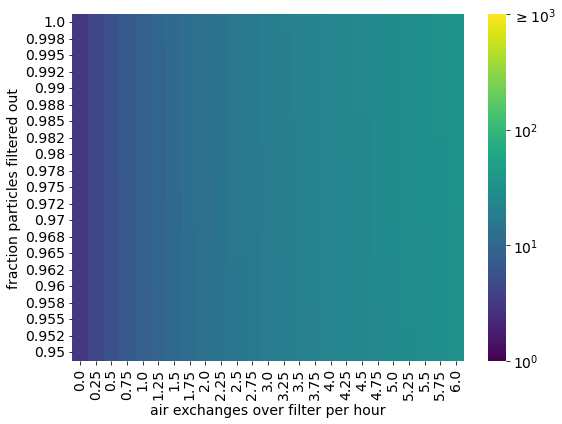

In [13]:
# FIGURE 5 PLOTS
num_virions_threshold = 500
xlab_text = "air exchanges over filter per hour"
ylab_text = "fraction particles filtered out"

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0.95, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0.9 # change to value > 0 for mask on emitter

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_intermed = []
plot_highemit = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})
sweep_dat["low_dep"] = (number_transmitted(sweep_dat["lowemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["high_dep"] = (number_transmitted(sweep_dat["highemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["int_dep"] = (number_transmitted(sweep_dat["intemit"], frac_deposited, breath_rate_children, breath_vol, 60))

max_for_plot = 3
min_for_plot = 0

# heatmap plotting for low emitter [wuhan with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="low_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="high_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with mask on emitter](colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="int_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# generate 2d sweep data (example sweeps filtration rate vs. filtration efficiency)
filt_effs = np.linspace(0.95, 1, num=21)
filt_rates = np.linspace(0, room_size*6/60, num=25)
mask_eff = 0 # change to value > 0 for mask on emitter

plot_effs = []
plot_rates = []
plot_lowemit = []
plot_intermed = []
plot_highemit = []
for eff in filt_effs:
    for rate in filt_rates:
        plot_effs.append(eff)
        plot_rates.append(rate)
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=rate, filt_eff=eff, mask_eff=mask_eff))
sweep_dat = pd.DataFrame({"eff":plot_effs, "rate":plot_rates, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})
sweep_dat["low_dep"] = (number_transmitted(sweep_dat["lowemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["high_dep"] = (number_transmitted(sweep_dat["highemit"], frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["int_dep"] = (number_transmitted(sweep_dat["intemit"], frac_deposited, breath_rate_children, breath_vol, 60))

# heatmap plotting for low emitter (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="low_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="high_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

# heatmap plotting for high emitter [delta with no mask on emitter] (colors are particles/volume)
to_plot = pd.pivot_table(sweep_dat, values="int_dep", index="eff", columns="rate") # can change from lowemit -> highemit
to_plot = np.log10(60*num_virions_threshold/to_plot)

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="viridis", vmin=min_for_plot, vmax=max_for_plot)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 3) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x*60/room_size, 3) for x in to_plot.columns], fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0, 1,2,3,4])
cbar.set_ticklabels(['$10^0$', '$10^1$', "$10^2$", "$\geq 10^3$", "$10^4$"])
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()


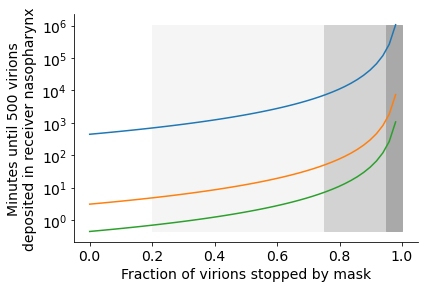

/Users/dve/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dve/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dve/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


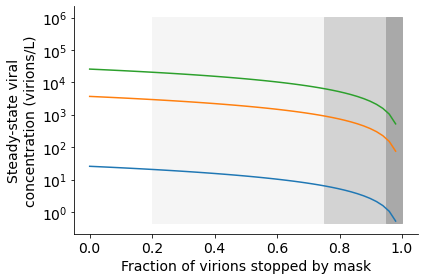

In [30]:
# FIGURE 6 PLOTS

mask_sweep = np.linspace(0,1)
num_virions_threshold = 500

low_plot = []
int_plot = []
high_plot = []

plot_lowemit = []
plot_intermed = []
plot_highemit = []
for mask_eff in mask_sweep:
        plot_lowemit.append(virus_steady_conc(lower_emission_delta, deg_rate, room_size, filt_rate=0, filt_eff=0, mask_eff=mask_eff))
        plot_intermed.append(virus_steady_conc(intermediate, deg_rate, room_size, filt_rate=0, filt_eff=0, mask_eff=mask_eff))
        plot_highemit.append(virus_steady_conc(upper_emission_delta, deg_rate, room_size, filt_rate=0, filt_eff=0, mask_eff=mask_eff))
sweep_dat = pd.DataFrame({"eff":mask_sweep, "lowemit":plot_lowemit, "highemit":plot_highemit,"intemit":plot_intermed})
sweep_dat["low_dep"] = (number_transmitted(np.multiply(1-mask_sweep,sweep_dat["lowemit"]), frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["high_dep"] = (number_transmitted(np.multiply(1-mask_sweep,sweep_dat["highemit"]), frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["int_dep"] = (number_transmitted(np.multiply(1-mask_sweep,sweep_dat["intemit"]), frac_deposited, breath_rate_children, breath_vol, 60))
sweep_dat["low_time"] = np.log10(60*num_virions_threshold/sweep_dat["low_dep"])
sweep_dat["int_time"] = np.log10(60*num_virions_threshold/sweep_dat["int_dep"])
sweep_dat["high_time"] = np.log10(60*num_virions_threshold/sweep_dat["high_dep"])
min_val = np.min(sweep_dat["high_time"])
max_val = 6.028764

xlab_text = "Fraction of virions stopped by mask"
ylab_text = "Minutes until 500 virions\ndeposited in receiver nasopharynx"

from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.add_patch(Rectangle((0.2, min_val), width=0.75-0.2, height=max_val-min_val, color="whitesmoke"))
ax.add_patch(Rectangle((0.75, min_val), width=0.95-0.75, height=max_val-min_val, color="lightgray"))
ax.add_patch(Rectangle((0.95, min_val), width=1-0.95, height=max_val-min_val, color="darkgrey"))

ax.plot(sweep_dat["eff"], sweep_dat["low_time"])
ax.plot(sweep_dat["eff"], sweep_dat["int_time"])
ax.plot(sweep_dat["eff"], sweep_dat["high_time"])
plt.yticks(ticks=range(0,7), labels=['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$"], fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()

ylab_text = "Steady-state viral\nconcentration (virions/L)"

fig, ax = plt.subplots()
ax.add_patch(Rectangle((0.2, min_val), width=0.75-0.2, height=max_val-min_val, color="whitesmoke"))
ax.add_patch(Rectangle((0.75, min_val), width=0.95-0.75, height=max_val-min_val, color="lightgray"))
ax.add_patch(Rectangle((0.95, min_val), width=1-0.95, height=max_val-min_val, color="darkgrey"))

ax.plot(sweep_dat["eff"], np.log10(sweep_dat["lowemit"]))
ax.plot(sweep_dat["eff"], np.log10(sweep_dat["intemit"]))
ax.plot(sweep_dat["eff"], np.log10(sweep_dat["highemit"]))
plt.yticks(ticks=range(0,7), labels=['$10^0$', '$10^1$', "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$"], fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel(ylab_text, fontsize=14)
plt.xlabel(xlab_text, fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(..., transparent=True)
plt.show()